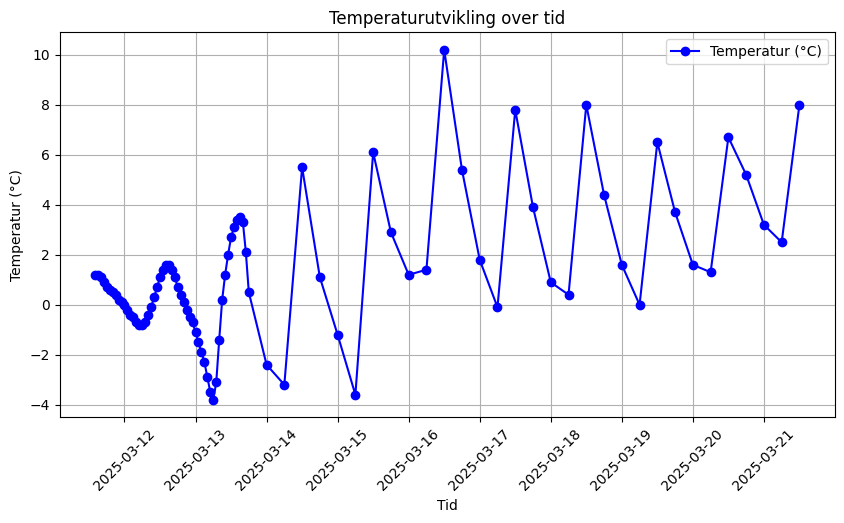

In [2]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import datetime

# Last inn XML-filen
file_path = "/Users/evinehfagerhaug/Library/Mobile Documents/com~apple~CloudDocs/Downloads/TDT4114/Miljo_data_analyse/testing av datasett/DataSett1.xml"
tree = ET.parse(file_path)
root = tree.getroot()

# Ekstraher temperaturdata og tidspunkter
times = []
temperatures = []

for time in root.findall(".//time"):
    from_time = time.get("from")  # Henter tidspunkt
    temperature_element = time.find(".//temperature")
    
    if temperature_element is not None:
        temp_value = float(temperature_element.get("value"))
        times.append(datetime.datetime.fromisoformat(from_time[:-1]))  # Fjerner 'Z' og konverterer til datetime
        temperatures.append(temp_value)

# Sorter dataene etter tid
sorted_data = sorted(zip(times, temperatures), key=lambda x: x[0])
times, temperatures = zip(*sorted_data)

# Plot temperatur over tid
plt.figure(figsize=(10, 5))
plt.plot(times, temperatures, marker='o', linestyle='-', color='b', label='Temperatur (°C)')
plt.xlabel("Tid")
plt.ylabel("Temperatur (°C)")
plt.title("Temperaturutvikling over tid")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()
